In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
d = pd.read_csv(r"C:\Users\Admin\Downloads\archive (5)\Mall_Customers.csv")

In [4]:
d.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
d.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [7]:
d.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
d.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
d.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
d.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


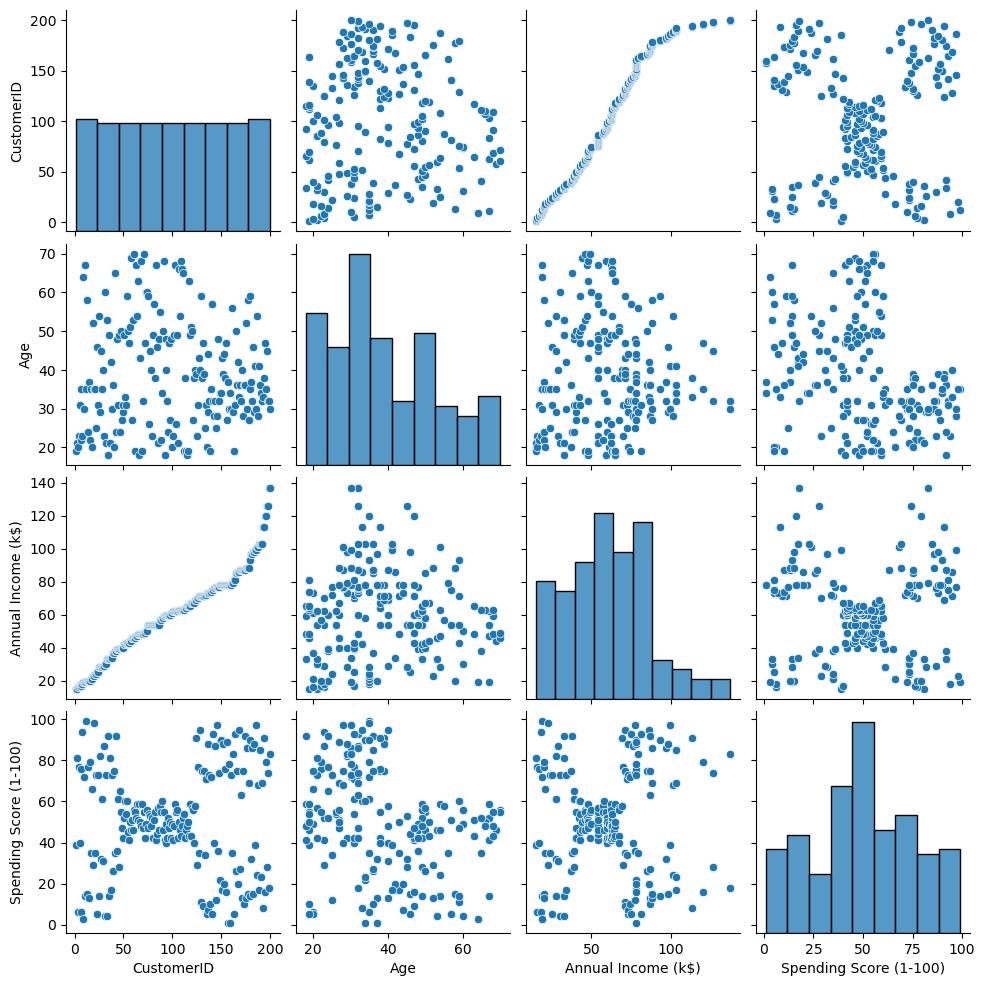

In [13]:
sns.pairplot(d)
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


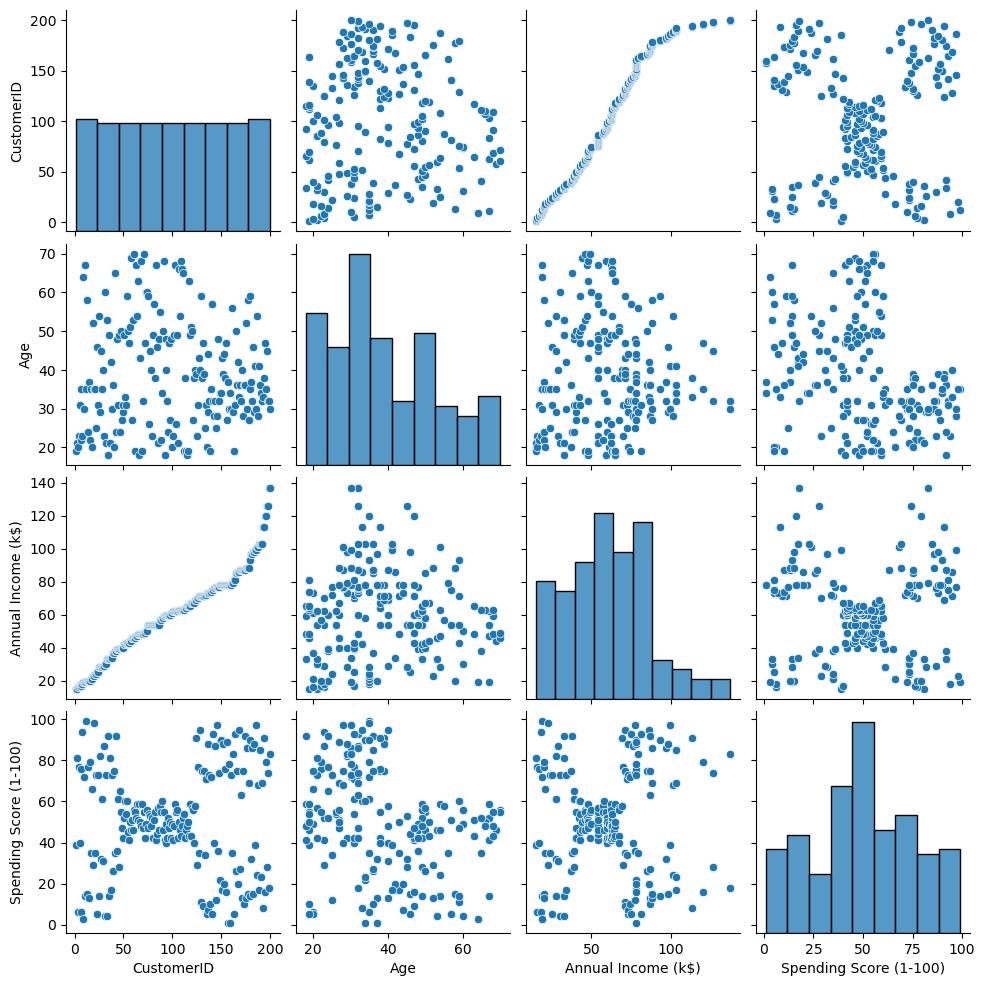

In [24]:
sns.pairplot(data=d)
plt.xlabel('CustomerId')
plt.ylabel('Age')
plt.show()

In [17]:
plt.figure(figsize=(8,8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

Text(0, 0.5, 'CustomerId')

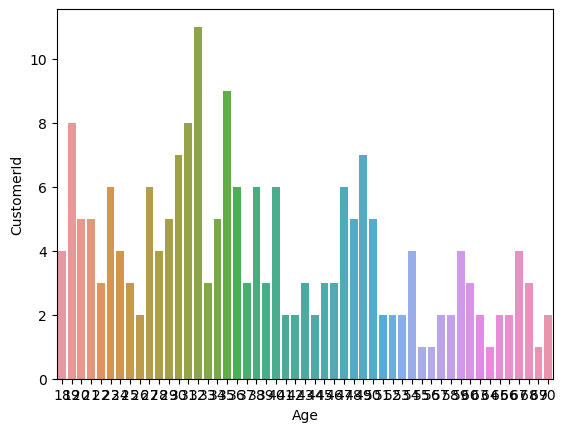

In [19]:
sns.countplot(data=d,x='Age')
plt.ylabel('CustomerId')

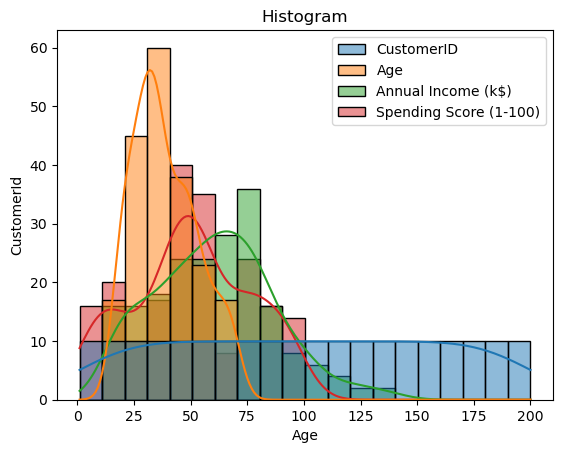

In [22]:
sns.histplot(data=d,bins=20,kde=True)
plt.ylabel('CustomerId')
plt.xlabel('Age')
plt.title("Histogram")
plt.show()

In [27]:
sel_features = ['CustomerId','Age','Annual Income (k$)']
num = d.select_dtypes(include=['float64','int64'])
correlation = num.corr()


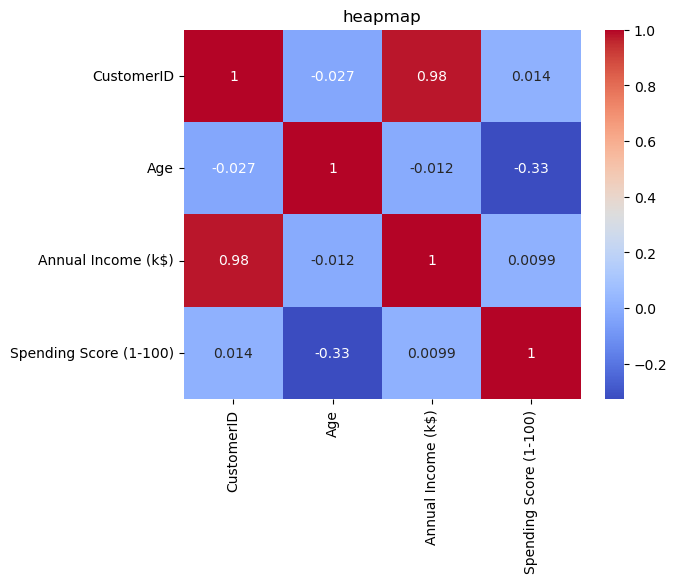

In [29]:
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title("heapmap")
plt.show()

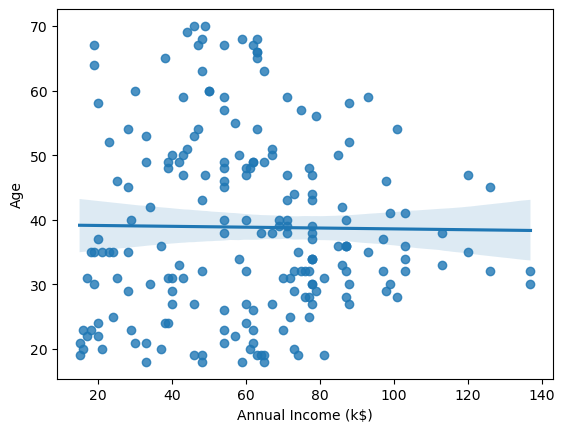

In [33]:
sns.regplot(data=d,x='Annual Income (k$)',y='Age')
plt.show()

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

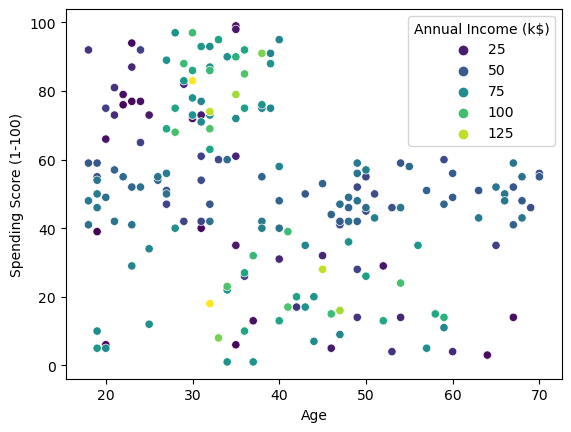

In [35]:
sns.scatterplot(data=d,x='Age',y='Spending Score (1-100)',hue='Annual Income (k$)',palette='viridis')

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

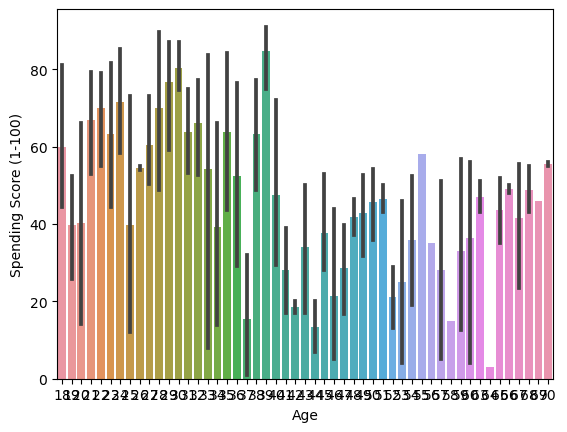

In [39]:
sns.barplot(data=d,x='Age',y='Spending Score (1-100)')

In [40]:
selected_features = ['Age','Spending Score (1-100)','Annual Income (k$)']
X = d[selected_features]

In [42]:
from sklearn.cluster import KMeans

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
kmeans = KMeans(n_clusters=4,random_state=42)
kmeans.fit(X)


KMeans(n_clusters=4, random_state=42)

In [53]:
num['cluster']=kmeans.labels_

In [50]:
cluster_name=num.groupby('cluster').mean()

In [51]:
print(cluster_name)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
cluster                                                                   
0         71.831579  44.894737           48.705263               42.631579
1        162.000000  32.692308           86.538462               82.128205
2         28.642857  24.821429           28.714286               74.250000
3        162.000000  40.394737           87.000000               18.631579
